<a href="https://colab.research.google.com/github/Muktesh007/Machine-Learning/blob/main/LAB7_AP23110011476.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 29.8MB/s]


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv('multiclass.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [37]:
df.drop_duplicates().reset_index(inplace=True)
print(df.isna().sum())
col=list(df.columns)
print(col)

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64
['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'class']


In [38]:
print(col)

['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'class']


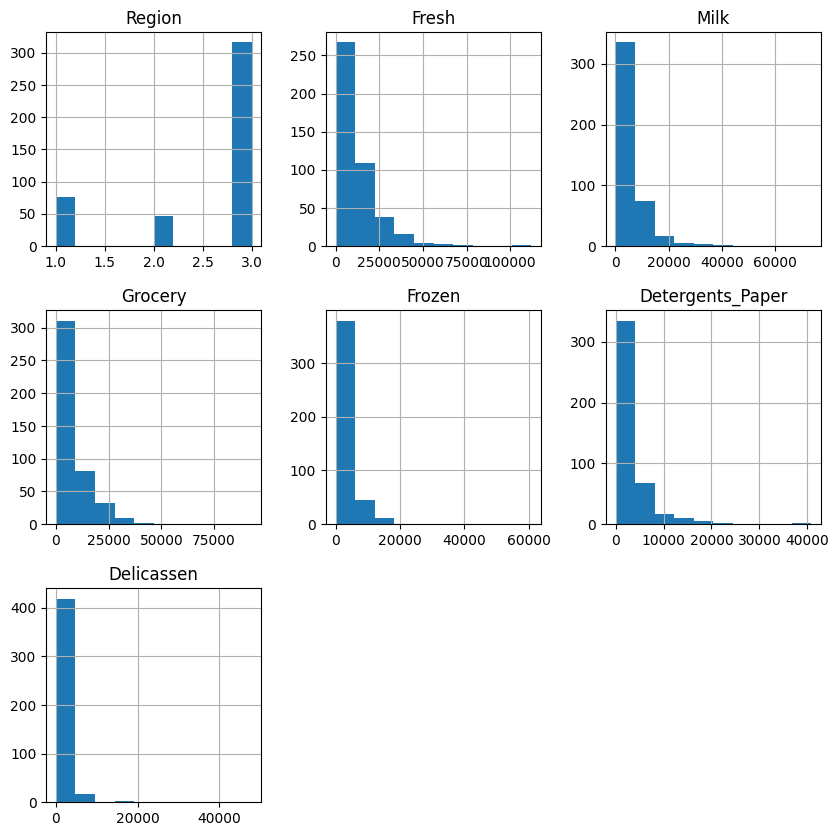

In [39]:
df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].hist(figsize=(10,10))
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")


Training data shape: (352, 7)
Testing data shape: (88, 7)


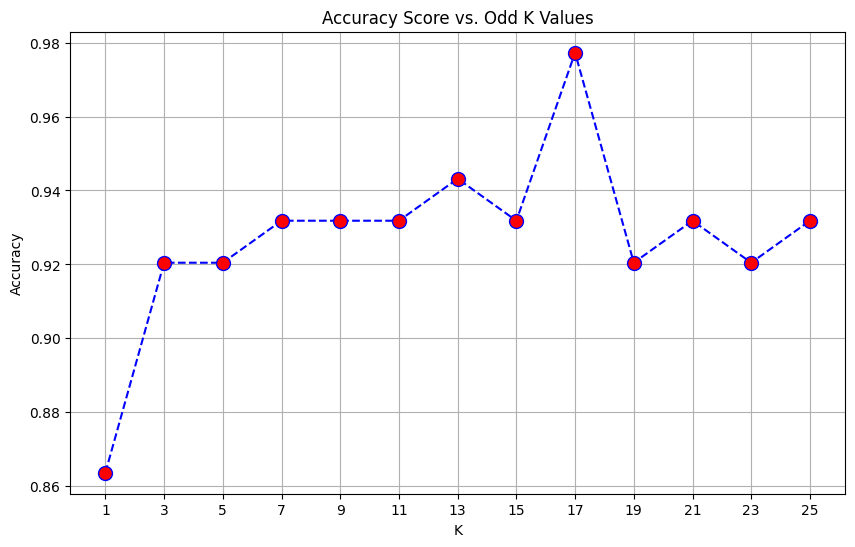

The highest accuracy among odd k-values is 0.9773 at k = 17


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN_Scratch:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

k_range = range(1, 26, 2)
accuracies = []

for k in k_range:
    model = KNN_Scratch(k=k)
    model.fit(X_train_scaled, y_train.to_numpy())
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. Odd K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()

optimal_k_index = np.argmax(accuracies)
optimal_k = list(k_range)[optimal_k_index]
print(f"The highest accuracy among odd k-values is {max(accuracies):.4f} at k = {optimal_k}")

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_sklearn = KNeighborsClassifier(n_neighbors=1)

knn_sklearn.fit(X_train_scaled, y_train)

y_pred_sklearn = knn_sklearn.predict(X_test_scaled)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"--- KNN From Scikit-learn (k={17}) ---")
print(f"Accuracy: {accuracy_sklearn:.4f}\n")

print("--- Classification Report (Scikit-learn) ---")

print(classification_report(y_test, y_pred_sklearn))

--- KNN From Scikit-learn (k=17) ---
Accuracy: 0.8636

--- Classification Report (Scikit-learn) ---
              precision    recall  f1-score   support

           1       0.74      0.82      0.78        17
           2       0.94      0.89      0.91        36
           3       0.86      0.86      0.86        35

    accuracy                           0.86        88
   macro avg       0.85      0.86      0.85        88
weighted avg       0.87      0.86      0.87        88



KNN IMPUTATION

In [43]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 36.0MB/s]


In [44]:
import pandas as pd
from sklearn.impute import KNNImputer

In [45]:
df=pd.read_csv('knn_imputation.csv',index_col=0)
df.head()


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [46]:
df.isna().sum()

,0
Region,8
Fresh,13
Milk,15
Grocery,9
Frozen,8
Detergents_Paper,10
Delicassen,11


In [47]:
X=df

In [48]:
imputer=KNNImputer(n_neighbors=3)
X=imputer.fit_transform(X)

In [49]:
pd.DataFrame(X,columns=df.columns).isna().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
